<a href="https://colab.research.google.com/github/Prabodh-09/CODSOFT/blob/main/Movies_Recommendation(task2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Woring with data

In [224]:
moviefile= pd.read_csv('https://github.com/Prabodh-09/CODSOFT/raw/main/IMDb%20Movies%20India.csv', encoding='latin-1')
moviefile.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [225]:
moviefile.info()
moviefile.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [226]:
moviefile.shape

(15509, 10)

In [227]:
value_counts = moviefile['Genre'].value_counts()

print(value_counts)

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64


In [228]:
moviefile.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


Data Preprocessing

In [229]:
moviefile.dropna(inplace=True)

moviefile['Year'] = moviefile['Year'].astype(str)

moviefile['Year'] = moviefile['Year'].str.extract('(\d+)').astype(float)
moviefile['Year'].fillna(moviefile['Year'].median(), inplace=True)

moviefile['Duration'] = moviefile['Duration'].str.extract('(\d+)').astype(float)
moviefile['Duration'].fillna(moviefile['Duration'].median(), inplace=True)

moviefile['Votes'] = pd.to_numeric(moviefile['Votes'], errors='coerce')

moviefile['Votes'].fillna(moviefile['Votes'].median(), inplace=True)

moviefile['Year'] = moviefile['Year'].astype(int)
moviefile['Duration'] = moviefile['Duration'].astype(int)
moviefile['Votes'] = moviefile['Votes'].astype(int)

print("Null values after filling and removing:")
print(moviefile.isnull().sum())
print("Preview of the cleaned dataset:")
print(moviefile.head())

Null values after filling and removing:
Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64
Preview of the cleaned dataset:
                                 Name  Year  Duration  \
1  #Gadhvi (He thought he was Gandhi)  2019       109   
3                             #Yaaram  2019       110   
5                ...Aur Pyaar Ho Gaya  1997       147   
6                           ...Yahaan  2005       142   
8                  ?: A Question Mark  2012        82   

                       Genre  Rating  Votes        Director          Actor 1  \
1                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance     4.4     35      Ovais Khan          Prateik   
5     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War     7.4     62  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller    

In [230]:
# Split the 'Genre' column by comma and take the first genre
moviefile['Genre'] = moviefile['Genre'].apply(lambda x: x.split(',')[0].strip())


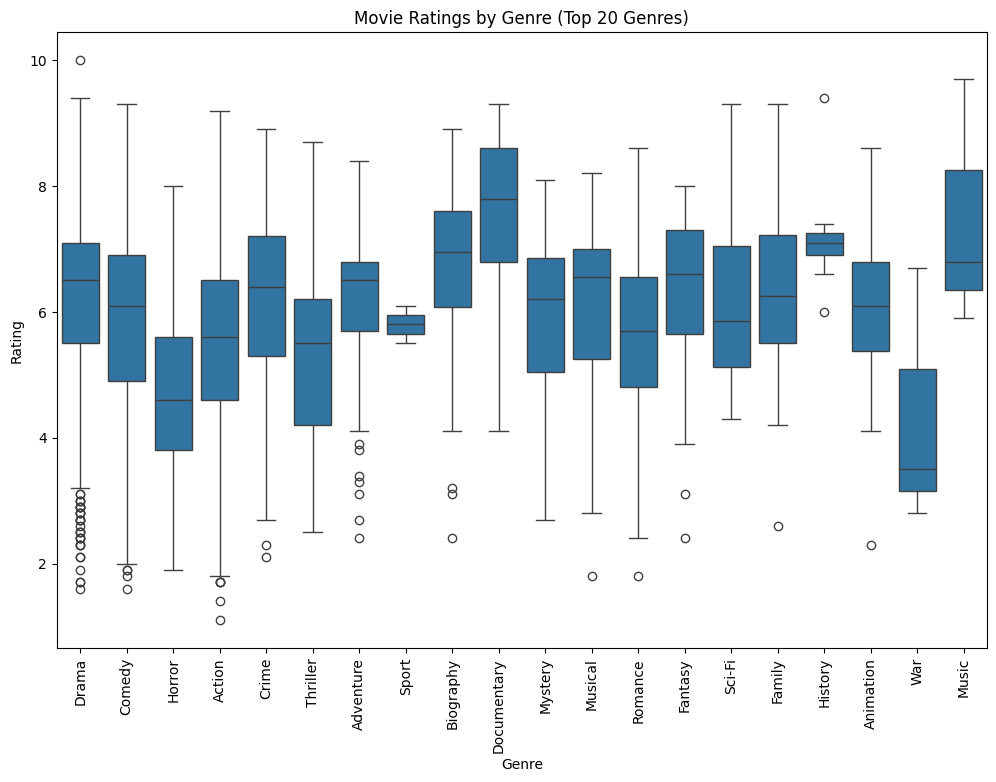

In [231]:
#Visualising


top_genres = moviefile['Genre'].value_counts().nlargest(20).index
filtered_file = moviefile[moviefile['Genre'].isin(top_genres)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Rating', data=filtered_file)
plt.xticks(rotation=90)
plt.title('Movie Ratings by Genre (Top 20 Genres)')
plt.show()

Defining Variables

In [232]:
x=moviefile[["Genre"]]
y=moviefile[["Rating"]]
y.head()


,Rating
1,7.0
3,4.4
5,4.7
6,7.4
8,5.6


Splitting into training and testing

In [234]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4244, 1), (1415, 1), (4244, 1), (1415, 1))

In [235]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


numerical_features = moviefile.drop('Rating', axis=1).select_dtypes(include=['number']).columns
categorical_features = moviefile.drop('Rating', axis=1).select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


x_processed = preprocessor.fit_transform(moviefile.drop('Rating', axis=1))

#train_test_split and model fitting
x_train, x_test, y_train, y_test = train_test_split(x_processed, moviefile['Rating'])
model = LinearRegression()
model.fit(x_train, y_train)  # Now fitting with numerically encoded data
ypred = model.predict(x_test)

Model Selection

In [236]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [239]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 1.5039553517391828
R-squared: 0.20087252810086964
